# ==CodeDetection==

## Load Libraries and select dataframe
### `pandas`
### `numpy`
### `matplotlib.pyplot`
### `missingno`
### `seaborn`

In [3]:
# Enable inline plotting in the notebook. Comes before importing matplotlib
%matplotlib inline
# import libraries
import pandas as pd # for working with dataframes
from pandas import DataFrame
import numpy as np # for arrays
import matplotlib.pyplot as plt # for plotting
import missingno as msno # used for missing numbers
import seaborn as sns # requires pandas and matplotlib, offers more visualization options
# Import Data
df = pd.read_csv('c:/LabFiles/d206/medical_raw_data.csv', index_col=0) # path to csv; change for your environment
pd.set_option("display.max_columns", None) # to display all columns

# 1. Check for duplicates
### `.duplicated()` method

In [4]:
# Duplicates whole dataframe
print(f"Are there duplicates in the 10,000 rows?==>{df.duplicated().value_counts()}")

Are there duplicates in the 10,000 rows?==>False    10000
Name: count, dtype: int64


# 2. Check for NULLs
`isnull().sum()`
## Check for Nulls visually
### missingno.matrix aliased as `msno.matrix()`
### matplotlib.pyplot aliased as `plt`

Children        2588
Age             2414
Income          2464
Soft_drink      2467
Overweight       982
Anxiety          984
Initial_days    1056
dtype: int64


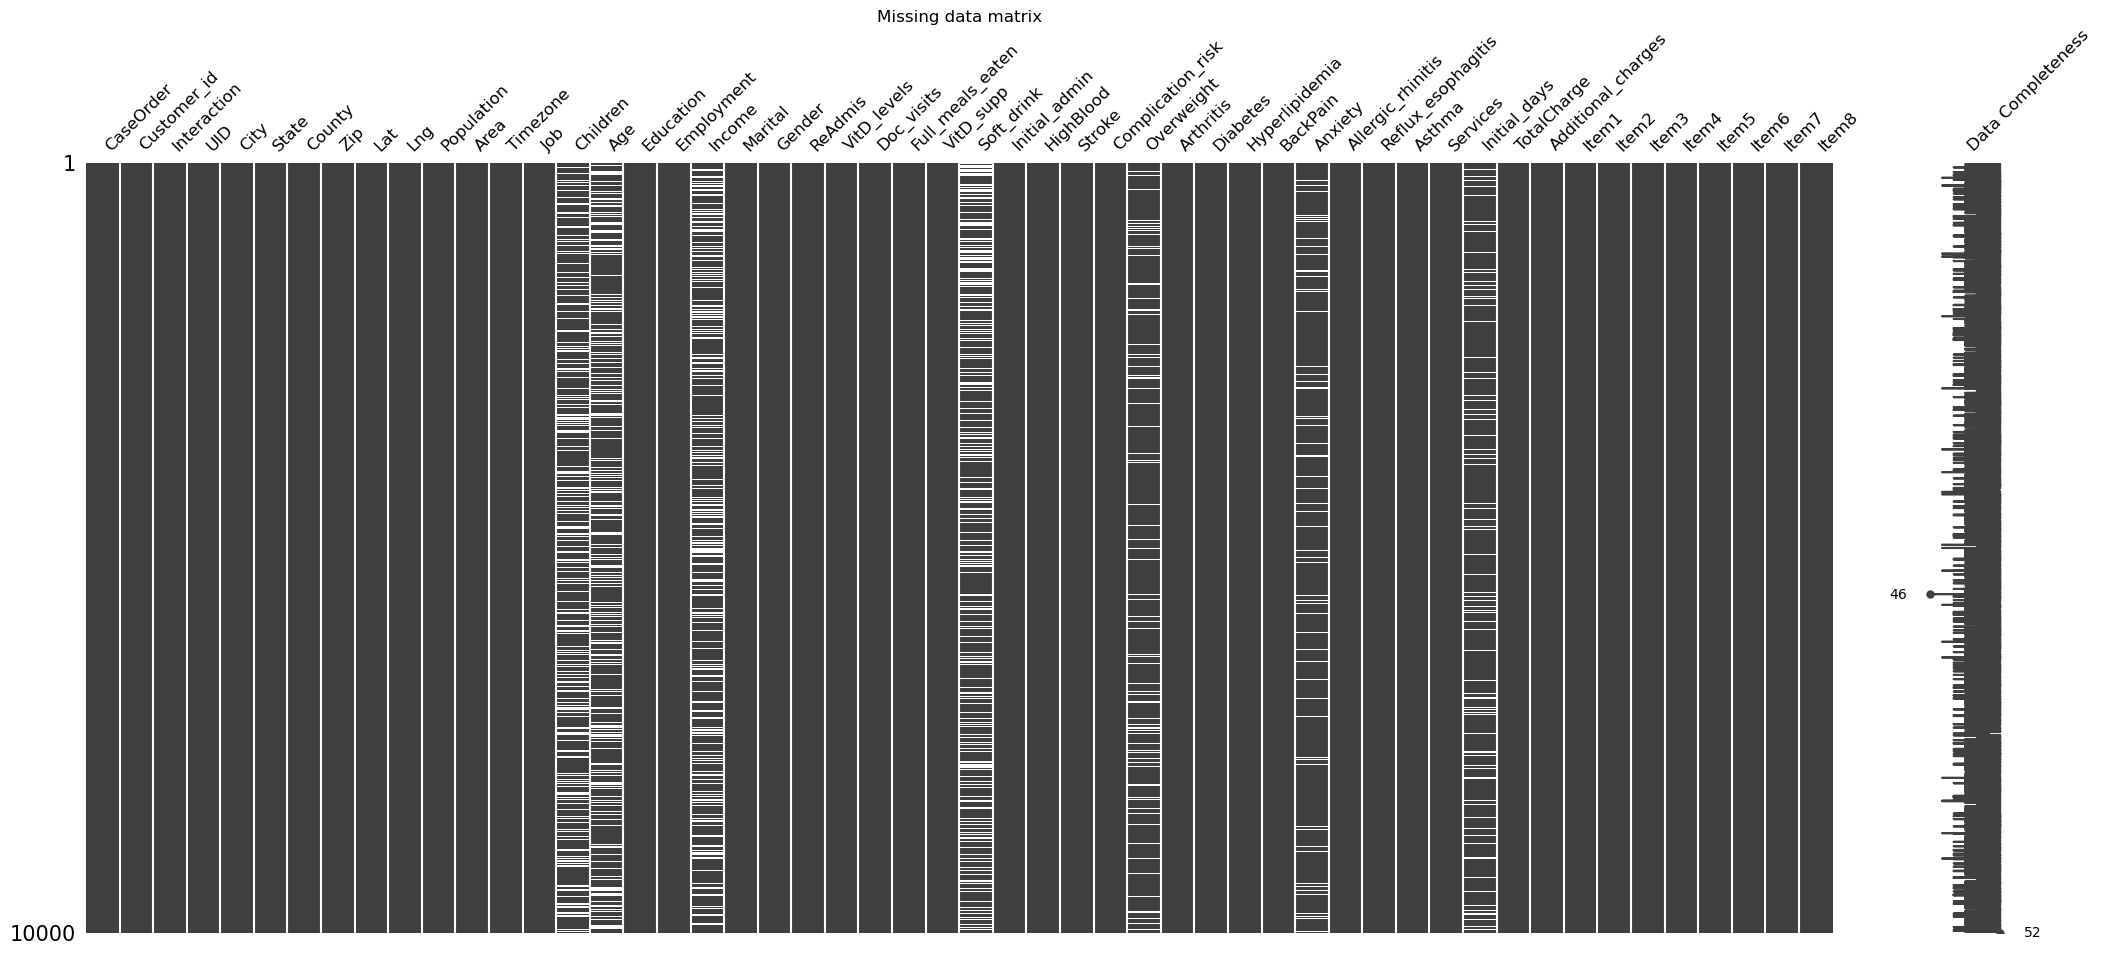

In [5]:
# Check for Nulls with `isnull().sum()`
null_counts = df.isnull().sum()
null_variables = null_counts[null_counts > 0]
print(null_variables)
# Check for nulls visually with missingno.matrix and matplotlib
msno.matrix(df, fontsize = 12, labels=True)
plt.title('Missing data matrix')
plt.show()

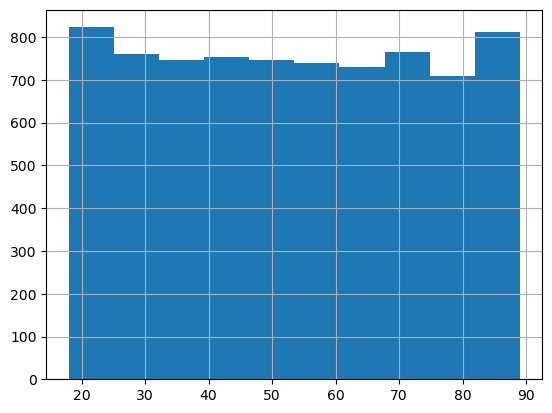

In [8]:
df['Age'].hist()
plt.show()

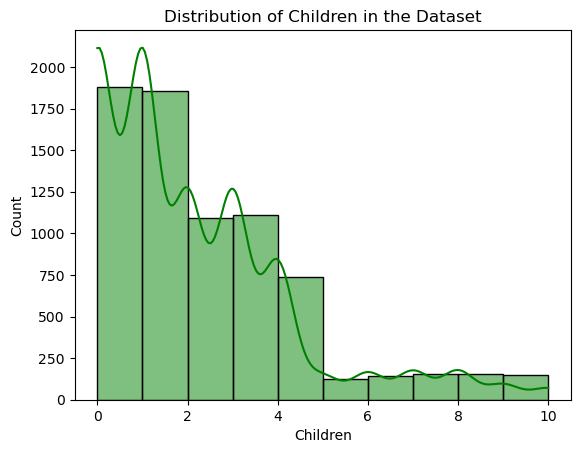

In [12]:
sns.histplot(data=df, x='Children', bins=10, color='green', kde=True)
plt.title('Distribution of Children in the Dataset')
plt.xlabel('Children')
plt.ylabel('Count')
plt.show()

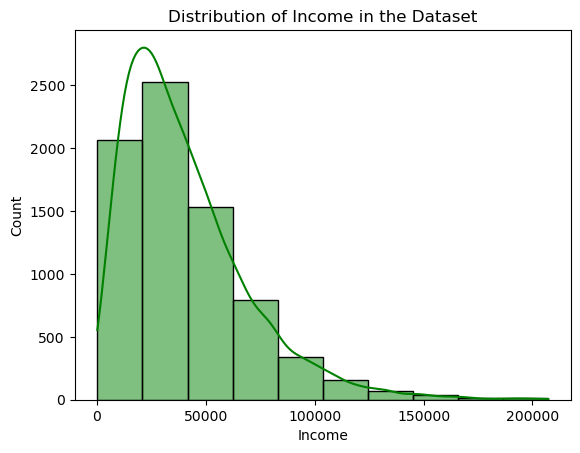

In [13]:
sns.histplot(data=df, x='Income', bins=10, color='green', kde=True)
plt.title('Distribution of Income in the Dataset')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

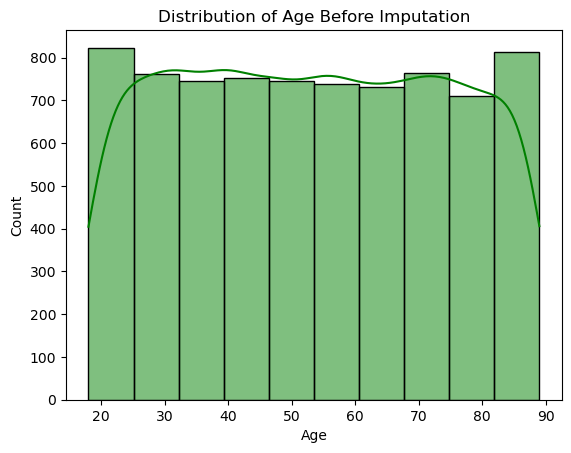

In [14]:
sns.histplot(data=df, x='Age', bins=10, color='green', kde=True)
plt.title('Distribution of Age Before Imputation')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# 3. Detecting Outliers
## Using Histograms and Boxplots
`.hist()`
`sns.boxplot` seaborn boxplot

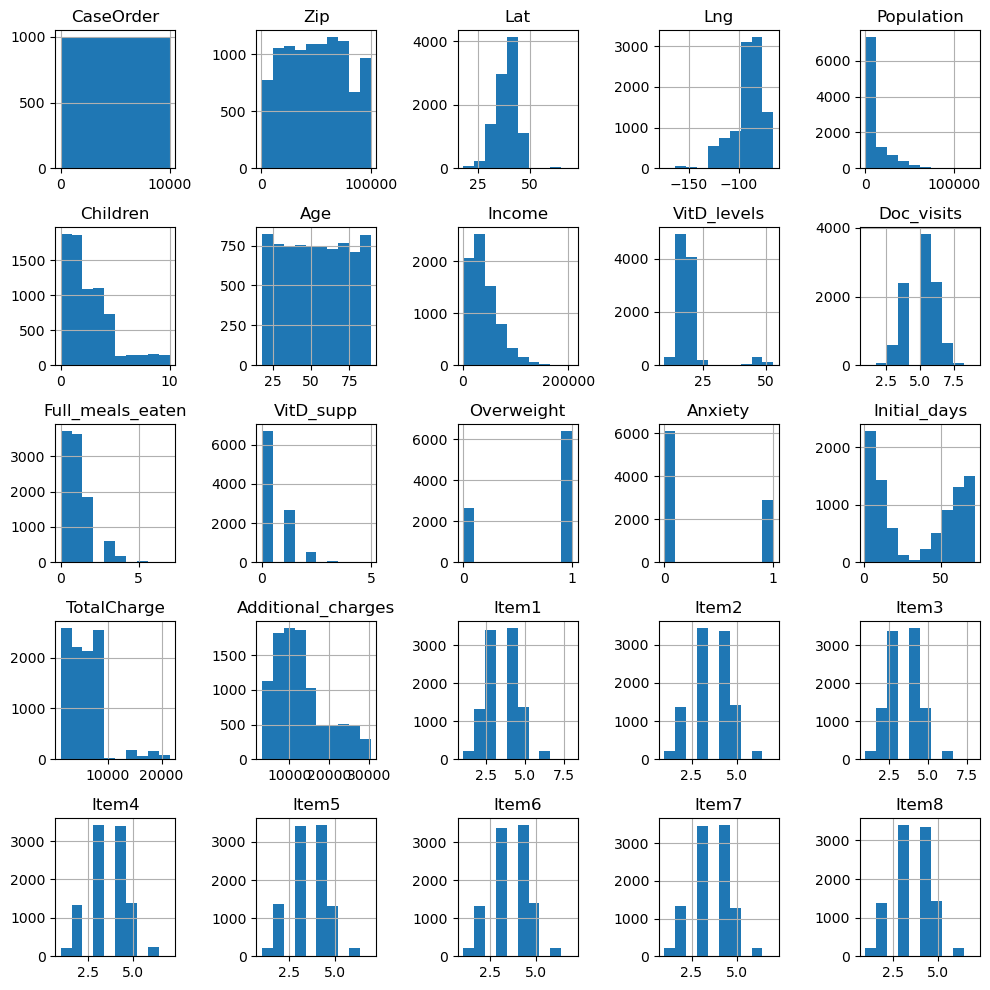

In [48]:
# Borba, B. (2021, February 17). How to change the space between histograms in pandas. Stack Overflow. Retrieved June 7, 2023, from https://stackoverflow.com/questions/52359595/how-to-change-the-space-between-histograms-in-pandas
# Histograms
df.hist(figsize=(10, 10))
plt.tight_layout()
plt.show()

***Checking with Boxplots***
Outliers for Population: 855
Outliers for Children: 303
Outliers for Age: 0
Outliers for Income: 252
Outliers for VitD_levels: 534
Outliers for Doc_visits: 0
Outliers for Full_meals_eaten: 8
Outliers for VitD_supp: 70
Outliers for Initial_days: 0
Outliers for TotalCharge: 466
Outliers for Additional_charges: 424
Outliers for Item1: 449
Outliers for Item2: 429
Outliers for Item3: 443
Outliers for Item4: 450
Outliers for Item5: 443
Outliers for Item6: 443
Outliers for Item7: 438
Outliers for Item8: 442


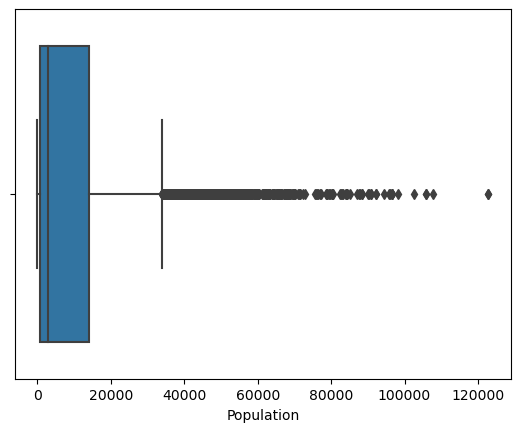

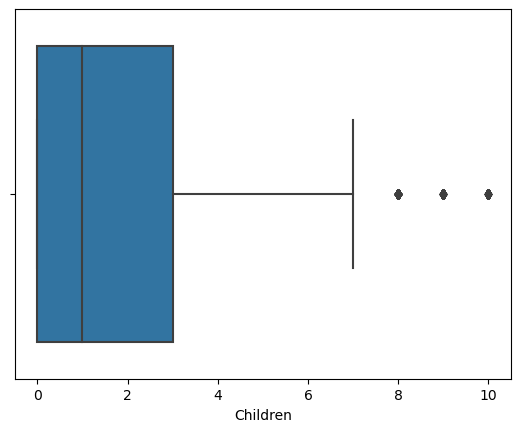

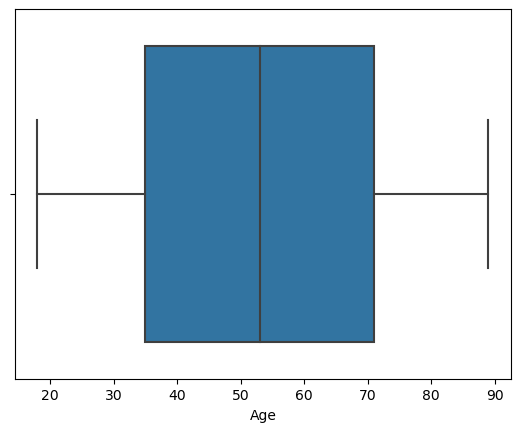

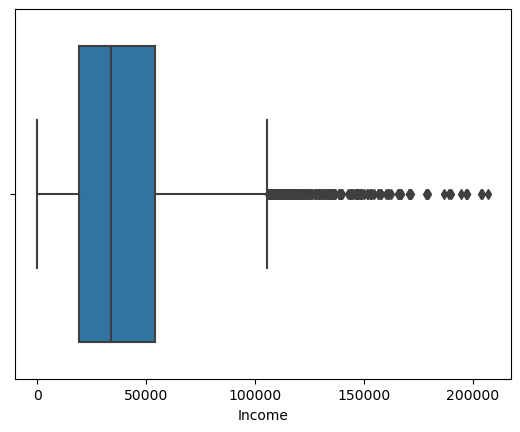

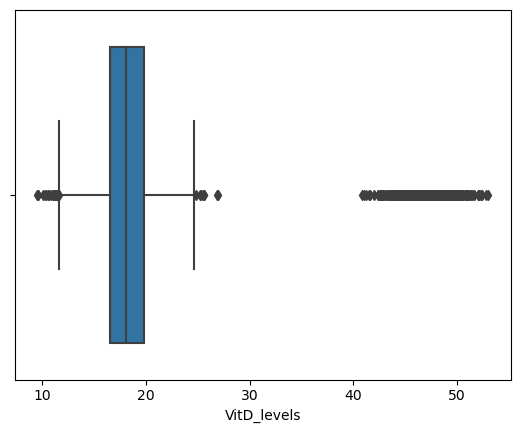

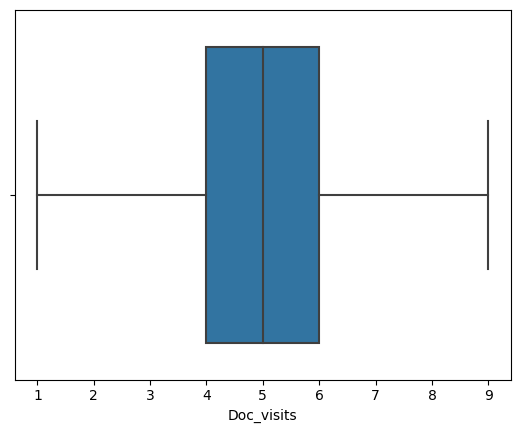

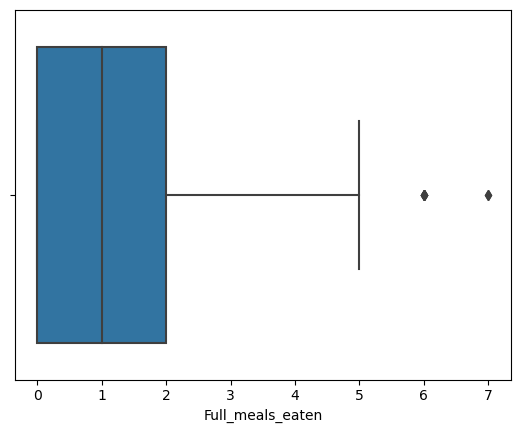

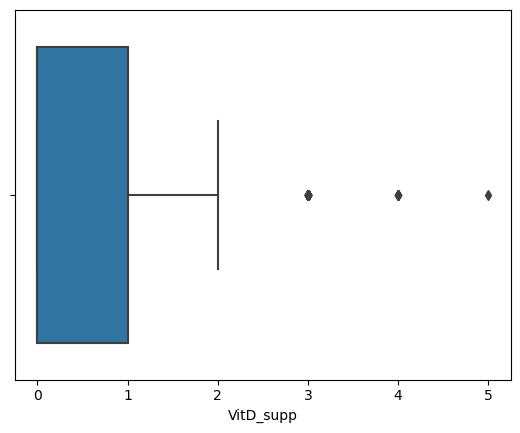

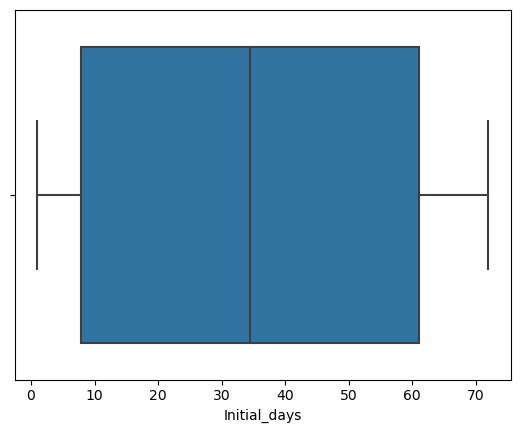

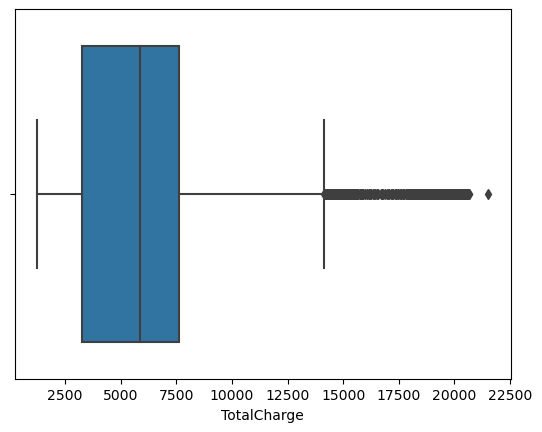

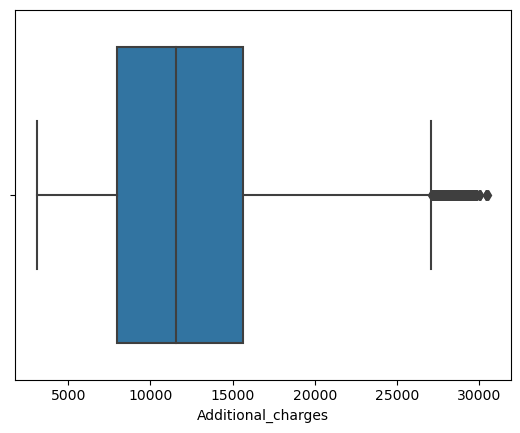

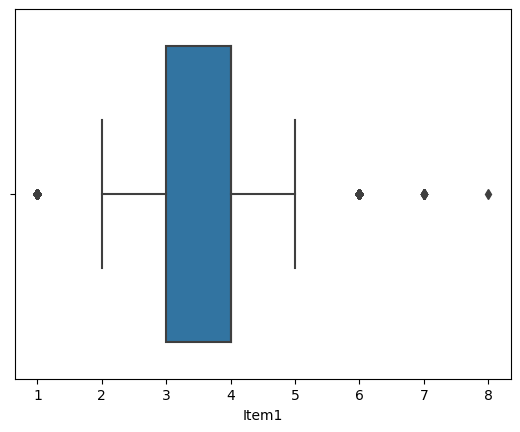

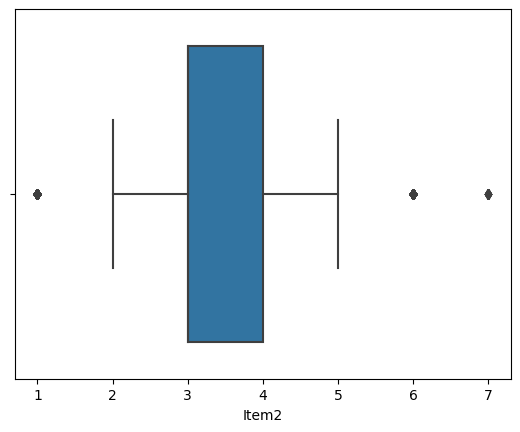

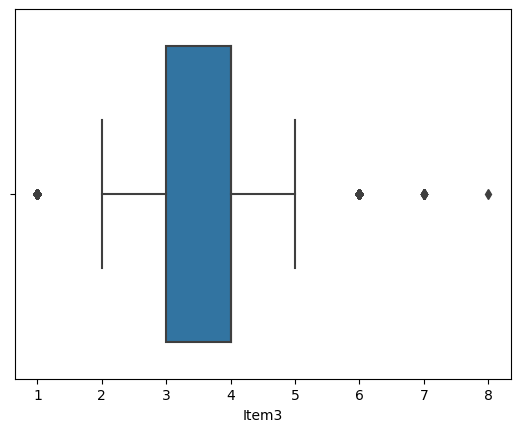

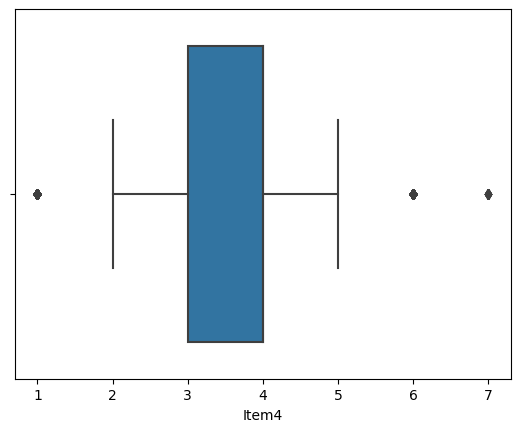

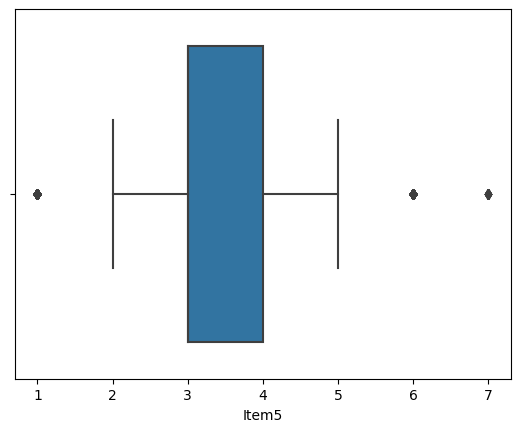

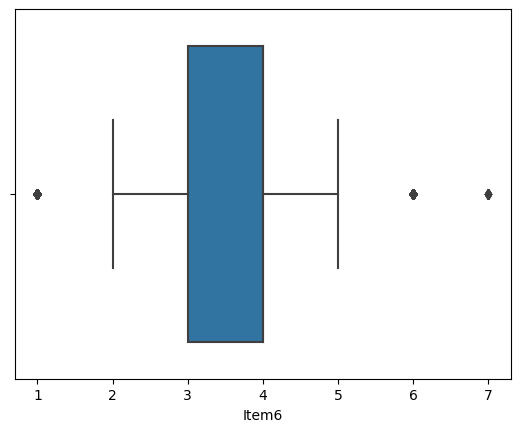

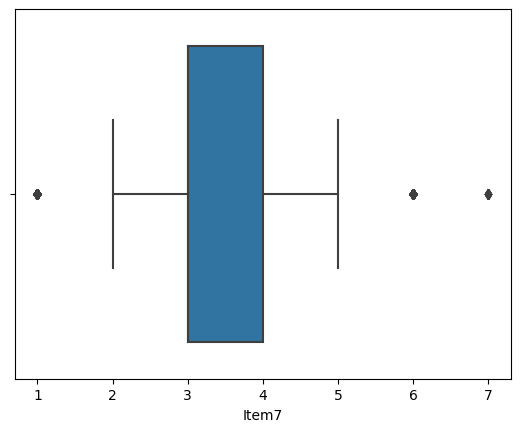

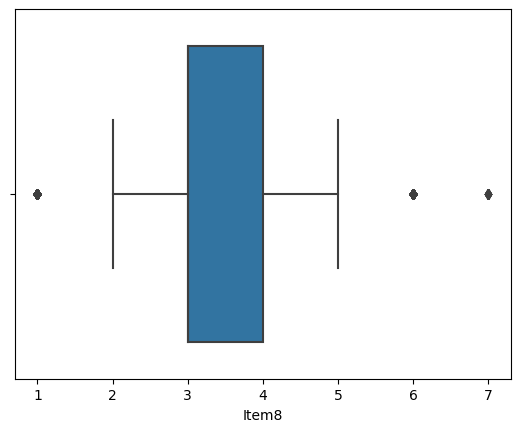

In [49]:
# Boxplots
print('***Checking with Boxplots***')
# filter on only int64 and float64 datatype
int_float_cols = [col for col in df.columns if df[col].dtype in ('int64', 'float64')]

# create check_outliers. Drop the columns we don't want 'CaseOrder', 'Lat', 'Lng', Unnamed: 0, 'Zip'. 'Overweight' and 'Anxiety' are qualitative values that are expressed numerically, and will be omitted
check_outliers = [col for col in int_float_cols if col not in ('CaseOrder', 'Lat', 'Lng', 'Overweight', 'Anxiety', 'Zip')] # list columns we DON'T want

# # Create a figure for each column
for col in check_outliers:
    plt.figure()
    sns.boxplot(x=df[col], data=df)
    
    # Get the lower and upper whiskers for the column
    # https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.quantile.html
    q1 = df[col].quantile(q=0.25)
    q3 = df[col].quantile(q=0.75)
    iqr = q3 - q1
    lower_whisker = q1 - 1.5 * iqr
    upper_whisker = q3 + 1.5 * iqr
    
    # Get the outliers for the column
    outliers = df[(df[col] < lower_whisker) | (df[col] > upper_whisker)][col]
    
    # Print the outliers for the column
    print(f"Outliers for {col}: {outliers.count()}")


# 5. Other Data Quality Issues - Values in Fields

In [50]:
# check unique values in fields/columns
for col in df.columns:
    unique_values = df[col].dropna().unique()
    print(col, unique_values)

CaseOrder [    1     2     3 ...  9998  9999 10000]
Customer_id ['C412403' 'Z919181' 'F995323' ... 'R778890' 'E344109' 'I569847']
Interaction ['8cd49b13-f45a-4b47-a2bd-173ffa932c2f'
 'd2450b70-0337-4406-bdbb-bc1037f1734c'
 'a2057123-abf5-4a2c-abad-8ffe33512562' ...
 '1d79569d-8e0f-4180-a207-d67ee4527d26'
 'f5a68e69-2a60-409b-a92f-ac0847b27db0'
 'bc482c02-f8c9-4423-99de-3db5e62a18d5']
UID ['3a83ddb66e2ae73798bdf1d705dc0932' '176354c5eef714957d486009feabf195'
 'e19a0fa00aeda885b8a436757e889bc9' ... '41b770aeee97a5b9e7f69c906a8119d7'
 '2bb491ef5b1beb1fed758cc6885c167a' '95663a202338000abdf7e09311c2a8a1']
City ['Eva' 'Marianna' 'Sioux Falls' ... 'Milmay' 'Quinn' 'Coraopolis']
State ['AL' 'FL' 'SD' 'MN' 'VA' 'OK' 'OH' 'MS' 'WI' 'IA' 'CA' 'IN' 'MO' 'MI'
 'NE' 'PA' 'AR' 'WV' 'KS' 'MA' 'KY' 'NY' 'VT' 'DC' 'IL' 'ND' 'SC' 'AK'
 'NM' 'NH' 'GA' 'NC' 'MD' 'TN' 'WA' 'TX' 'CO' 'NJ' 'LA' 'OR' 'AZ' 'ME'
 'ID' 'UT' 'RI' 'MT' 'PR' 'NV' 'CT' 'HI' 'WY' 'DE']
County ['Morgan' 'Jackson' 'Minnehaha' ... 'Nava